<a href="https://colab.research.google.com/github/emmetbrowne/CNN/blob/main/CS4287_Assign2_18238637_16172639.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# - Emmet Browne - 18238637, Henry deLongue - 16172639

# - The code executes to the end without an error.

Implementation based on this dataset: https://www.kaggle.com/datasets/alxmamaev/flowers-recognition

In [ ]:
# - Here we are mounting my google drive, which contains the dataset - flowers.zip

from google.colab import drive
drive.mount('/content/drive/')


Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# - We will need to import ZipFile to successfully unzip the file from my drive,
# - to put it in the 'storage' folder
from zipfile import ZipFile

Unzip the folders

In [ ]:
# - Unzipping the flowers.zip file

with ZipFile('drive/MyDrive/CS4287/flowers.zip', 'r') as zipObj:
  zipObj.extractall('drive/MyDrive/CS4287/storage')

In [ ]:
# - Here we are installing / importing any necessary packages

!pip install tensorflow keras
!pip install tensorflow keras preprocessing
!pip install split-folders

import numpy as np
import pandas as pd
import os
import sys
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf


from keras_preprocessing.image import load_img
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.utils import img_to_array




Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Dataset



In [ ]:
# - Here we are listing the types of flowers we wish to classify

CLASSES = ['daisy','dandelion','rose','sunflower','tulip'] 
print("Number of flower classes: ", len(CLASSES))
print(CLASSES)

Number of flower classes:  5
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


/content/drive/MyDrive/CS4287/storage/flowers/


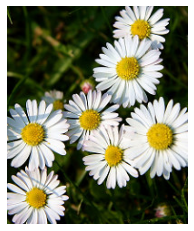

In [ ]:
# - Loading a single image from the 'daisy' folder

dir = '/content/drive/MyDrive/CS4287/storage/flowers/'
print(dir)
img = load_img(dir + CLASSES[0] + "/144076848_57e1d662e3_m.jpg")
plt.imshow(img)
plt.axis("off")
plt.show()



In [ ]:
# - Printing selected image to an array
x = img_to_array(img)
print(x.shape)

(240, 199, 3)


## Data Pre-processing

*   Analyze the images from each sub-folder
*   CV2 reads in as BGR so this is converted into RGB
*   Normalize the image arrays for testing



In [ ]:
IMG_SIZE = 48
training_data = []
numsOfEachFlowerClass = []

def create_training_data():
  
  for c in CLASSES:
    #join the class name to the directory
    path = os.path.join(dir,c)
    count = 0
    class_num = CLASSES.index(c)
    for im in os.listdir(path):
      if im[-4:]=='.jpg':
        try:
          img_array = cv2.imread(os.path.join(path, im))
          image = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
          resized_img_array = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
          count += 1

          #normalise the image pixel values
          image = resized_img_array/255.0
          
          training_data.append([image, class_num])
        except Exception as e:
          pass
    numsOfEachFlowerClass.append(count)

create_training_data()

Investigating the data:

This data-set contains over 4000 images

It has a mean of roughly 2 which means that the data is balanced as the class numbers go from 0 to 4

In [ ]:
# - Calculating the mean / other attributes of the data

df = pd.DataFrame(training_data, columns=['Image Arrays', 'Flower Class'])
df.describe()

,Flower Class
count,4317.000000
mean,2.028029
std,1.425767
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


Correlation:
Since we only have the Flower Class to correlate - we cannot perform correlation on the data

In [ ]:
import random

# - We are shuffling the data because currently, the data is in groups of classes
# - i.e, the first 800 rows are Daisies, and we don't want the model to be overfitted
# - on Daisies and then switching to another class
random.shuffle(training_data)

In [ ]:
# - Validating that the data is shuffled, by seeing if the class numbers vary
for im in training_data[:10]:
  print(im[1])

0
1
2
2
3
4
1
3
3
2


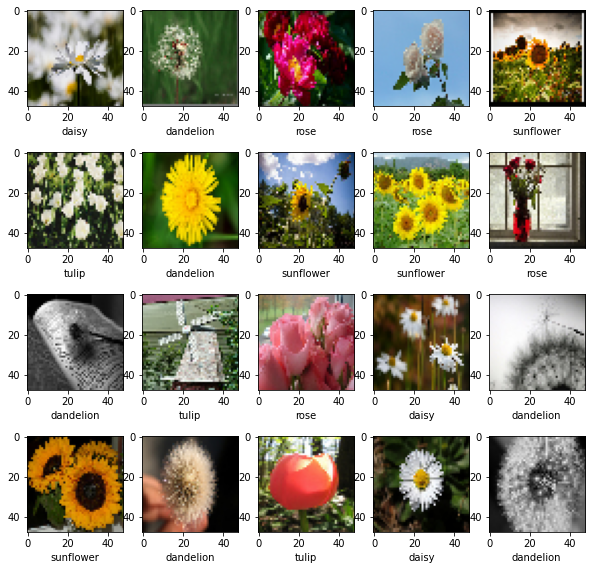

In [ ]:
# - Sampling the first 20 images in the 
plt.figure(figsize=(10,10))
for i in range(20):
    
    plt.subplot(4,5,i+1)
    plt.grid(False)
    img = training_data[i][0]
    plt.imshow(img)
    plt.xlabel(CLASSES[training_data[i][1]])
plt.show()

We are investigating the data types and if the columns have null values or not

### Visualisation
We wanted to visualise the correlation of the data; 
try see which variables might indicate a the likelihood stroke

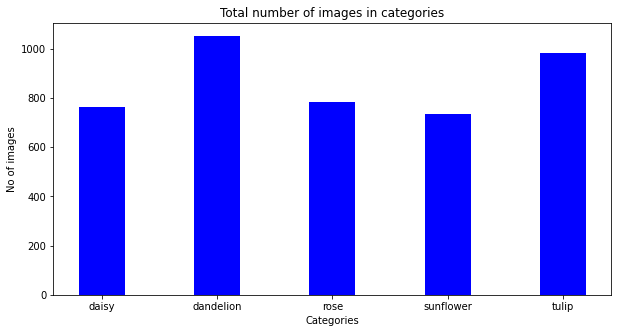

In [ ]:
fig = plt.figure(figsize = (10, 5))
 
# - Creating the bar plot
plt.bar(CLASSES, numsOfEachFlowerClass, color ='blue',
        width = 0.4)
 
plt.xlabel("Categories")
plt.ylabel("No of images")
plt.title("Total number of images in categories")
plt.show()

# Preparing Test and Train sets

In [ ]:
# - Creating features and labels

X = []
y = []

We separate the training data into features (image arrays) and labels (flower class)

In [ ]:
for features, label in training_data[:-2]:
  X.append(features)
  y.append(label)

# - Reshape the image arrays to be 48 x 48 pixels and to be RGB hence the '3'
X = np.array(X).reshape((-1, IMG_SIZE, IMG_SIZE, 3))

# - Here we converts our label/class array of integers to binary class matrix.
y = tf.keras.utils.to_categorical(y)
y = np.array(y)

In [ ]:
print(X.shape)
print(y.shape)

(4315, 48, 48, 3)
(4315, 5)


In [ ]:
# - We get train and test sets for each of the X and y
# - The test size is 20% of the overall 
trainx, testx, trainy, testy = train_test_split(X,
                                                y,
                                                test_size=0.2,
                                                random_state=44)

In [ ]:
print(trainx.shape)
print(trainy.shape)
print(testx.shape)
print(testy.shape)

(3452, 48, 48, 3)
(3452, 5)
(863, 48, 48, 3)
(863, 5)


# Network

In [ ]:
# - Importing more necessary Packages

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,Conv2D,MaxPooling2D
from tensorflow.keras.models import Model
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# - Here we perform some image augmentation
# - EG: Rotate them, zoom in, or flip them 

datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,
                             rotation_range=20,zoom_range=0.2,
                            width_shift_range=0.2,height_shift_range=0.2,
                             shear_range=0.1,fill_mode="nearest")

In [ ]:
# - We initialise the dense net 201 with the correct input shape of the data
# - We get the weights from imagenet
pretrained_model = tf.keras.applications.DenseNet201(input_shape=(48,48,3),
                                                      include_top=False,
                                                      weights='imagenet',
                                                      pooling='avg')
pretrained_model.trainable = False

74836368/74836368 [==============================] - 1s 0us/step


In this block, we define the inputs and outputs for the pretrained model.

activation We use 'relu' for the Dense model layers

We use 'softmax' for the output layer The output layer has a size of the number of flower classes in the dataset.

In [ ]:
inputs = pretrained_model.input
x3 = tf.keras.layers.Dense(128, activation='relu')(pretrained_model.output)
outputs = tf.keras.layers.Dense(len(CLASSES), activation='softmax')(x3)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

Loss function

We first decided that categorical_crossentropy is the best choice as there are more than 2 flower classes. But we later found out that MSE gives us a significantly lower loss value.

We tried using sparse_categorical_crossentropy but this did not match the shape of the data.

Optimizer

optimizer is 'adam' in order to attempt to minimize the loss function as fast as possible. This gave us the best accuracy and the least loss.

Metrics

We want to see the accuracy of the model as it runs.

In [ ]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['accuracy'])

We want to print out what the model looks like. We can see there are many layers including Batch Normalisation, Dense... etc.

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 48, 48, 3)]  0           []                               
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 54, 54, 3)   0           ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 24, 24, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 24, 24, 64)   256         ['conv1/conv[0][0]']             
                                                                                              

**Fitting/Training the model**

Epochs sets the number of iterations of the model. We chose 10 epochs after some testing to try get the best result without overfitting. This was also partially due to constraints of the system we used to run the model.

Batch size splits the data into batches and processes them in parallel. We set this to 32 as we got the best results with this.

Verbose is boolean and logs the output so we set verbose to true.

We set the validation_data to the test sets. This is using an automatic validation dataset on our classification.

Now we save the models history so we can evaluate the accuracy and loss later

In [ ]:
# - Here we fit the model. We apply the image data generator to perform data augmentation
# - To prevent overfitting. 
# - Validation of the model is performed using the test sets 

hist = model.fit(datagen.flow(trainx,trainy,batch_size=32),
                 epochs=10, 
                 validation_data=(testx,testy)
)

Epoch 1/10
108/108 [==============================] - 78s 583ms/step - loss: 0.1116 - accuracy: 0.5701 - val_loss: 0.0952 - val_accuracy: 0.6396
Epoch 2/10
108/108 [==============================] - 55s 512ms/step - loss: 0.0934 - accuracy: 0.6587 - val_loss: 0.0873 - val_accuracy: 0.6848
Epoch 3/10
108/108 [==============================] - 59s 546ms/step - loss: 0.0862 - accuracy: 0.6854 - val_loss: 0.0846 - val_accuracy: 0.6976
Epoch 4/10
108/108 [==============================] - 56s 518ms/step - loss: 0.0831 - accuracy: 0.7010 - val_loss: 0.0809 - val_accuracy: 0.7045
Epoch 5/10
108/108 [==============================] - 68s 635ms/step - loss: 0.0813 - accuracy: 0.7016 - val_loss: 0.0827 - val_accuracy: 0.6976
Epoch 6/10
108/108 [==============================] - 75s 695ms/step - loss: 0.0787 - accuracy: 0.7132 - val_loss: 0.0819 - val_accuracy: 0.6929
Epoch 7/10
108/108 [==============================] - 69s 639ms/step - loss: 0.0775 - accuracy: 0.7178 - val_loss: 0.0806 - val_ac

# Results

Here we consider the results. 

'y_pred' is an array containing the predictions from the model based on the test set.

In [ ]:
y_pred = model.predict(testx)

# - This array will contain the predicted class number of each image from 0 to 4
predicted_classes = np.argmax(y_pred, axis=1)

ground = np.argmax(testy, axis=1)
print(classification_report(ground,predicted_classes))

27/27 [==============================] - 15s 381ms/step
              precision    recall  f1-score   support

           0       0.63      0.73      0.67       154
           1       0.66      0.79      0.72       197
           2       0.69      0.64      0.66       157
           3       0.79      0.62      0.70       152
           4       0.73      0.65      0.69       203

    accuracy                           0.69       863
   macro avg       0.70      0.69      0.69       863
weighted avg       0.70      0.69      0.69       863



Here we plot the first 20 images of the dataset and their actual vs their predicted flower class

1/1 [==============================] - 0s 69ms/step


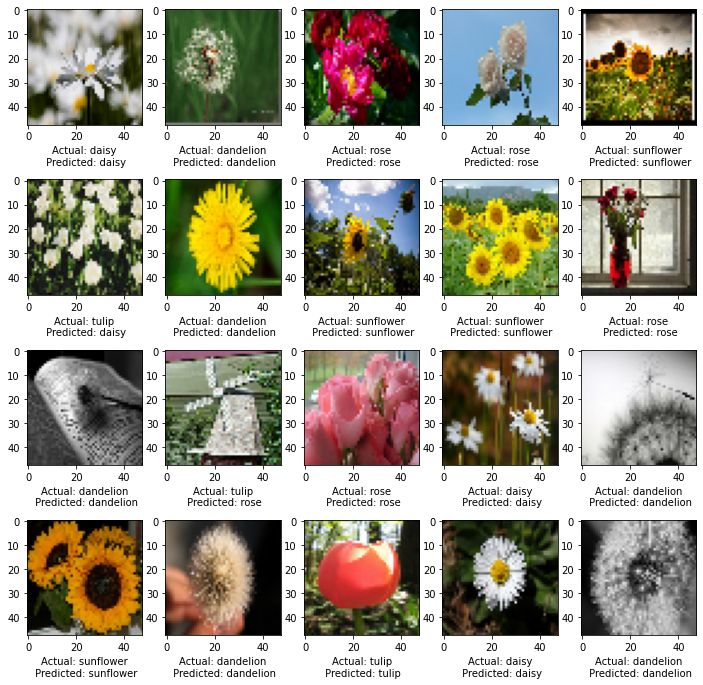

In [ ]:
# - You can see that it predicts a lot of the flower images well

plt.figure(figsize=(12,12))

for i in range(20):
    
    plt.subplot(4,5,i+1)
    plt.grid(False)
    img = training_data[i][0]
    plt.imshow(img)
    img = np.array(img)
    img = np.expand_dims(img, axis=0)
    
    prediction = model.predict(img)
    value = np.argmax(prediction)
    plt.xlabel("Actual: "+ CLASSES[training_data[i][1]] 
               + "\n Predicted: " + CLASSES[value])
    
plt.show()



# Evaluation

Evaluate the model on the test set

Tracking Results with different hyper params:

**Loss Function**
1. Categorical_crossentropy: ~70% loss
2. MSE: ~7% loss

We decided to chose MSE as to estimate the loss of the model so that the weights can be changed to reduce the loss.

**Optimizers**:

1. adam -> ~70.5% accuracy, 7% loss
2. SGD -> ~70% accuracy and 8% loss
3. RMSProp -> ~67% accuracy, 12% loss
4. adamax -> 65% accuracy, 9% loss


**Batch Size**

We increased the batch size and quickly noticed the accuracy reducing. Therefore we decided on a batch size of 32 in order to speed up computation while maintaining good accuracy.

In [ ]:
score = model.evaluate(testx, testy, verbose=1)
print("loss = " + str(score[0]*100) + "% \naccuracy: "+ str(score[1]*100) + "%")

27/27 [==============================] - 10s 382ms/step - loss: 0.0818 - accuracy: 0.6895
loss = 8.179852366447449% 
accuracy: 68.94553899765015%


**Check for overfitting and underfitting**

A model is thought to be overfitting if your validation loss has been increasing and underfit is the validation loss is still decreasing.



Next we plot how the accuracy changed over the Epochs on both the train and validation data.

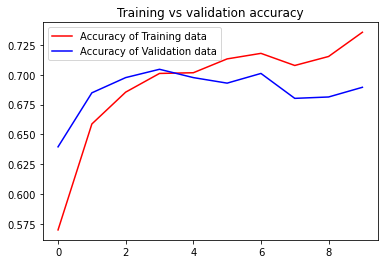

<Figure size 432x288 with 0 Axes>

In [ ]:
get_acc = hist.history['accuracy']
value_acc = hist.history['val_accuracy']
get_loss = hist.history['loss']
validation_loss = hist.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

We can see above that the accuracy seems to level out between epochs 4 and 10.

Plot the validation set loss over the epochs

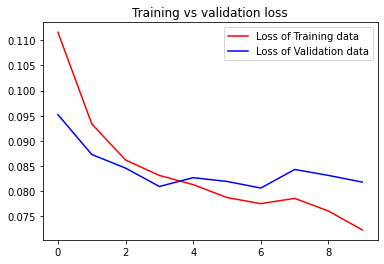

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

We had a much higher loss with categorical_crossentropy than we now have with MSE